In [ ]:
# default_exp mining.unsupervised.traceability.approach

# Neural Unsupervised Approaches for SE Traceability [approach]

> This module is dedicated to evaluate word2vec/doc2vec or any neural unsupervised approaches on traceability datasets. Consider to Copy the entire notebook for a new and separeted empirical evaluation. 
>
> Author: @danaderp April 2020

In [ ]:
#TODO
# http://www.ashukumar27.io/similarity_functions/
# https://www.kdnuggets.com/2017/08/comparing-distance-measurements-python-scipy.html
# https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d
# https://www.kdnuggets.com/2019/01/comparison-text-distance-metrics.html

In [ ]:
# export
# Imports
import numpy as np
import gensim
import pandas as pd
from itertools import product 
from random import sample 
import functools 
import os

from ds4se.mining.unsupervised.traceability.approach import *

ModuleNotFoundError: No module named 'ds4se.mining'

In [ ]:
from datetime import datetime
import seaborn as sns

In [ ]:
#export
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from prg import prg
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot
import math as m
import random as r
import collections
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from gensim.models import WordEmbeddingSimilarityIndex
from gensim.similarities import SparseTermSimilarityMatrix
from gensim import corpora

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
from scipy.spatial import distance
from scipy.stats import pearsonr

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
parameters = default_params()
parameters

{'vectorizationType': <VectorizationType.word2vec: 1>,
 'linkType': <LinkType.req2tc: 1>,
 'system': 'libest',
 'path_to_trained_model': 'test_data/models/word2vec_libest.model',
 'source_path': 'test_data/[libest-pre-req].csv',
 'target_path': 'test_data/[libest-pre-tc].csv',
 'system_path': 'test_data/[libest-pre-all].csv',
 'saving_path': 'test_data/',
 'names': ['Source', 'Target', 'Linked?']}

In [ ]:
#[step 1]Creating the Vectorization Class
word2vec = Word2VecSeqVect( params = parameters )

2020-10-18 19:10:31,915 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 19:10:32,004 : INFO : built Dictionary(6957 unique tokens: ['");', '"../../', '("\\', '();', ')))']...) from 87 documents (total 88944 corpus positions)
2020-10-18 19:10:32,005 : INFO : loading Word2Vec object from test_data/models/word2vec_libest.model
2020-10-18 19:10:32,124 : INFO : loading wv recursively from test_data/models/word2vec_libest.model.wv.* with mmap=None
2020-10-18 19:10:32,125 : INFO : setting ignored attribute vectors_norm to None
2020-10-18 19:10:32,126 : INFO : loading vocabulary recursively from test_data/models/word2vec_libest.model.vocabulary.* with mmap=None
2020-10-18 19:10:32,141 : INFO : loading trainables recursively from test_data/models/word2vec_libest.model.trainables.* with mmap=None
2020-10-18 19:10:32,143 : INFO : setting ignored attribute cum_table to None
2020-10-18 19:10:32,156 : INFO : loaded test_data/models/word2vec_libest.model
2020-10-18 19:10:32,

In [ ]:
word2vec.df_source['ids'][0]

'test_data/LibEST_semeru_format/requirements/RQ17-pre.txt'

In [ ]:
idss = word2vec.df_source['ids'][0] #Selecting an ID
idss = word2vec.df_source['ids'] == idss #Search for an specific ID
list(word2vec.df_source[idss]['text'])[0].split() #Retrieving text and splitting

['requir',
 'http',
 'uri',
 'control',
 'est',
 'server',
 'must',
 'support',
 'use',
 'path',
 'prefix',
 'well',
 'known',
 'defin',
 'rfc',
 'regist',
 'name',
 'est',
 'thus',
 'valid',
 'est',
 'server',
 'uri',
 'path',
 'begin',
 'https',
 'www',
 'exampl',
 'com',
 'well',
 'known',
 'est',
 'est',
 'oper',
 'indic',
 'path',
 'suffix',
 'indic',
 'intend',
 'oper',
 'oper',
 'correspond',
 'uri',
 'oper',
 'oper',
 'path',
 'detail',
 'distribut',
 'cacert',
 'section',
 'certif',
 'must',
 'enrol',
 'simpleenrol',
 'section',
 'client',
 'must',
 'enrol',
 'simplereenrol',
 'section',
 'client',
 'must',
 'full',
 'cmc',
 'option',
 'fullcmc',
 'section',
 'server',
 'side',
 'key',
 'serverkeygen',
 'section',
 'generat',
 'option',
 'csr',
 'attribut',
 'csrattr',
 'section',
 'option',
 'figur',
 'oper',
 'path',
 'figur',
 'append',
 'path',
 'prefix',
 'form',
 'uri',
 'use',
 'http',
 'get',
 'post',
 'perform',
 'desir',
 'est',
 'oper',
 'exampl',
 'valid',
 'uri',


In [ ]:
word2vec.df_source.head()

,ids,text
0,test_data/LibEST_semeru_format/requirements/RQ...,requir http uri control est server must suppor...
1,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat respons request...
2,test_data/LibEST_semeru_format/requirements/RQ...,requir http base client authent est server may...
3,test_data/LibEST_semeru_format/requirements/RQ...,requir csr attribut request est client request...
4,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat est client may ...


In [ ]:
word2vec.df_target.head()

,ids,text
0,test_data/LibEST_semeru_format/test/us903.c,unit test user stori server simpl enrol august...
1,test_data/LibEST_semeru_format/test/us3496.c,unit test uri path segment extens support marc...
2,test_data/LibEST_semeru_format/test/us899.c,unit test user stori client simpl enrol septem...
3,test_data/LibEST_semeru_format/test/us4020.c,unit test user stori unit test client proxi mo...
4,test_data/LibEST_semeru_format/test/us897.c,unit test user stori client cacert june copyri...


In [ ]:
links = word2vec.samplingLinks(sampling=True, samples = 2)
links

[('RQ8-pre.txt', 'us4020.c'), ('RQ6-pre.txt', 'us1864.c')]

In [ ]:
print( len(links), word2vec.df_source.shape, word2vec.df_target.shape )

2 (52, 2) (21, 2)


In [ ]:
#[optional] computeDistanceMetric Testing [WARNING!] Time Consuming!!
computeDistanceMetric = word2vec.computeDistanceMetric(links, metric_list = [DistanceMetric.WMD,DistanceMetric.SCM])
computeDistanceMetric

2020-10-18 18:53:19,395 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 18:53:19,398 : INFO : built Dictionary(397 unique tokens: ['abl', 'absent', 'altern', 'applic', 'associ']...) from 2 documents (total 1145 corpus positions)
2020-10-18 18:53:23,494 : INFO : Computed distances or similarities ('RQ25-pre.txt', 'us896.c')[[0.47075769695671116, 0.6799216499558003], [0.7143128514289856, 0.28568715]]
2020-10-18 18:53:23,497 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 18:53:23,501 : INFO : built Dictionary(536 unique tokens: ['abl', 'accept', 'administr', 'authent', 'author']...) from 2 documents (total 2598 corpus positions)
2020-10-18 18:53:25,366 : INFO : Computed distances or similarities ('RQ35-pre.txt', 'us893.c')[[0.42247504232645433, 0.7030000318068867], [0.5571423470973969, 0.44285765]]


([['RQ25-pre.txt',
   'us896.c',
   0.47075769695671116,
   0.6799216499558003,
   0.7143128514289856,
   0.28568715],
  ['RQ35-pre.txt',
   'us893.c',
   0.42247504232645433,
   0.7030000318068867,
   0.5571423470973969,
   0.44285765]],
 [<DistanceMetric.WMD: 1>,
  <SimilarityMetric.WMD_sim: 1>,
  <DistanceMetric.SCM: 3>,
  <SimilarityMetric.SCM_sim: 3>])

In [ ]:
#[step 2]NonGroundTruth Computation
word2vec.ComputeDistanceArtifacts( sampling=True, samples = 50, metric_list = [DistanceMetric.WMD,DistanceMetric.SCM] )
word2vec.df_nonground_link.head()

2020-10-18 19:12:52,630 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 19:12:52,635 : INFO : built Dictionary(516 unique tokens: ['attribut', 'client', 'csr', 'csrattr', 'desir']...) from 2 documents (total 2484 corpus positions)
2020-10-18 19:12:53,192 : INFO : Computed distances or similarities ('RQ48-pre.txt', 'us893.c')[[0.3546829269802515, 0.7381801158660191], [0.35216033458709717, 0.64783967]]
2020-10-18 19:12:53,202 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 19:12:53,206 : INFO : built Dictionary(529 unique tokens: ['authent', 'author', 'base', 'cacert', 'certif']...) from 2 documents (total 2535 corpus positions)
2020-10-18 19:12:54,593 : INFO : Computed distances or similarities ('RQ33-pre.txt', 'us893.c')[[0.38586590012929317, 0.7215705357255026], [0.5318330824375153, 0.46816692]]
2020-10-18 19:12:54,597 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 19:12:54,603 : INFO : built Dictionary(111

2020-10-18 19:13:36,844 : INFO : Computed distances or similarities ('RQ45-pre.txt', 'us3496.c')[[0.3832968648173863, 0.7229106242006942], [0.5843002200126648, 0.41569978]]
2020-10-18 19:13:36,848 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 19:13:36,853 : INFO : built Dictionary(1145 unique tokens: ['accept', 'appli', 'authent', 'author', 'bootstrap']...) from 2 documents (total 2998 corpus positions)
2020-10-18 19:13:43,508 : INFO : Computed distances or similarities ('RQ26-pre.txt', 'us1883.c')[[0.36241007482871196, 0.7339933977849689], [0.4114319086074829, 0.5885681]]
2020-10-18 19:13:43,513 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 19:13:43,516 : INFO : built Dictionary(432 unique tokens: ['accept', 'access', 'also', 'altern', 'assur']...) from 2 documents (total 2762 corpus positions)
2020-10-18 19:13:45,445 : INFO : Computed distances or similarities ('RQ20-pre.txt', 'us898.c')[[0.5216272201063454, 0.6571911876879482],

2020-10-18 19:17:47,993 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 19:17:47,997 : INFO : built Dictionary(549 unique tokens: ['addit', 'administr', 'advis', 'alreadi', 'applic']...) from 2 documents (total 2584 corpus positions)
2020-10-18 19:17:51,126 : INFO : Computed distances or similarities ('RQ16-pre.txt', 'us893.c')[[0.31895590030182386, 0.7581754627058908], [0.43098413944244385, 0.56901586]]
2020-10-18 19:17:51,136 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 19:17:51,153 : INFO : built Dictionary(748 unique tokens: ['0ja7', '0pf', '1122', '200', '2lmcnf']...) from 2 documents (total 2674 corpus positions)
2020-10-18 19:19:09,813 : INFO : Computed distances or similarities ('RQ57-pre.txt', 'us901.c')[[0.3431319529988065, 0.7445284863987511], [0.45869094133377075, 0.54130906]]
2020-10-18 19:19:09,821 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 19:19:09,825 : INFO : built Dictionary(429 uniq

,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim
0,RQ48-pre.txt,us893.c,0.354683,0.738180,0.352160,0.647840
1,RQ33-pre.txt,us893.c,0.385866,0.721571,0.531833,0.468167
2,RQ48-pre.txt,us2174.c,0.344219,0.743927,0.384508,0.615492
3,RQ4-pre.txt,us896.c,0.509115,0.662640,0.756483,0.243517
4,RQ52-pre.txt,us897.c,0.452641,0.688401,0.761394,0.238606


In [ ]:
#[step 3]Saving Non-GroundTruth Links
word2vec.SaveLinks()

2020-10-18 19:23:20,297 : INFO : Saving in...test_data/[libest-VectorizationType.word2vec-LinkType.req2tc-False-1603063400.288883].csv


In [ ]:
#Loading Non-GroundTruth Links (change the timestamp with the assigned in the previous step)
df_nonglinks = LoadLinks(timestamp=1603063400.288883, params=parameters)
df_nonglinks.head()

2020-10-18 19:23:33,487 : INFO : Loading computed links from... test_data/[libest-VectorizationType.word2vec-LinkType.req2tc-False-1603063400.288883].csv


,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim
0,RQ48-pre.txt,us893.c,0.354683,0.738180,0.352160,0.647840
1,RQ33-pre.txt,us893.c,0.385866,0.721571,0.531833,0.468167
2,RQ48-pre.txt,us2174.c,0.344219,0.743927,0.384508,0.615492
3,RQ4-pre.txt,us896.c,0.509115,0.662640,0.756483,0.243517
4,RQ52-pre.txt,us897.c,0.452641,0.688401,0.761394,0.238606


In [ ]:
#[step 4]GroundTruthMatching Testing
path_to_ground_truth = 'test_data/[libest-ground-req-to-tc].txt'
word2vec.MatchWithGroundTruth(path_to_ground_truth)
word2vec.df_ground_link

2020-10-18 19:25:25,721 : INFO : NumExpr defaulting to 4 threads.
2020-10-18 19:25:25,744 : INFO : Groundtruth links computed


,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,Linked?
0,RQ48-pre.txt,us893.c,0.354683,0.738180,0.352160,0.647840,1.0
1,RQ33-pre.txt,us893.c,0.385866,0.721571,0.531833,0.468167,1.0
2,RQ48-pre.txt,us2174.c,0.344219,0.743927,0.384508,0.615492,0.0
3,RQ4-pre.txt,us896.c,0.509115,0.662640,0.756483,0.243517,0.0
4,RQ52-pre.txt,us897.c,0.452641,0.688401,0.761394,0.238606,0.0
5,RQ18-pre.txt,us896.c,0.536422,0.650863,0.734830,0.265170,0.0
6,RQ36-pre.txt,us898.c,0.448945,0.690157,0.645753,0.354247,1.0
7,RQ15-pre.txt,us1005.c,0.390783,0.719019,0.482108,0.517892,0.0
8,RQ37-pre.txt,us893.c,0.344751,0.743632,0.514701,0.485299,1.0
9,RQ27-pre.txt,us3612.c,0.473896,0.678474,0.698716,0.301284,0.0


In [ ]:
#[optional]GroundTruth Direct Processing
ground_links = word2vec.ground_truth_processing(path_to_ground_truth)
ground_links[141] # A tuple

('RQ33.txt', 'us894.c')

In [ ]:
#Inspecting Source
ground_links[141][0][:ground_links[141][0].find('.')] + '-'

'RQ33-'

In [ ]:
#Inspecting Target
ground_links[141][1][:ground_links[141][1].find('.')]

'us894'

In [ ]:
#[step 5]Saving GroundTruth Links
word2vec.SaveLinks(grtruth = True)

2020-10-18 19:25:33,828 : INFO : Saving in...test_data/[libest-VectorizationType.word2vec-LinkType.req2tc-True-1603063533.824472].csv


In [ ]:
#Loading Non-GroundTruth Links (change the timestamp with the assigned in the previous step)
df_glinks = LoadLinks(timestamp=1603063533.824472, params=parameters,grtruth = True)
df_glinks.head()

2020-10-18 19:26:09,535 : INFO : Loading computed links from... test_data/[libest-VectorizationType.word2vec-LinkType.req2tc-True-1603063533.824472].csv


,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,Linked?
0,RQ48-pre.txt,us893.c,0.354683,0.738180,0.352160,0.647840,1.0
1,RQ33-pre.txt,us893.c,0.385866,0.721571,0.531833,0.468167,1.0
2,RQ48-pre.txt,us2174.c,0.344219,0.743927,0.384508,0.615492,0.0
3,RQ4-pre.txt,us896.c,0.509115,0.662640,0.756483,0.243517,0.0
4,RQ52-pre.txt,us897.c,0.452641,0.688401,0.761394,0.238606,0.0


## Confusion Matrix

In [ ]:
y_score_threshold = [0 if elem<=0.8 else 1 for elem in supevisedEval.y_score] #Hardcoded 0.7 Threshold

In [ ]:
#TODO a Variation threshold analysis
tn, fp, fn, tp = confusion_matrix(supevisedEval.y_test, y_score_threshold).ravel()

In [ ]:
(tn, fp, fn, tp)

(31, 0, 19, 0)

## Precision-Racall-Gain
Based on the library here: [link](https://github.com/meeliskull/prg/tree/master/Python_package). 
The area under traditional PR curves can easily favour models with lower expected F1 score than others, and so the use of Precision-Recall-Gain curves will result in better model selection [(Flach & Kull, 2015)](http://people.cs.bris.ac.uk/~flach//PRGcurves/).
One might choose PRG if there is little interest in identifying false negatives [(from Blog)](https://medium.com/@alexabate/i-did-something-boring-so-you-dont-have-to-9140ca46c84d).

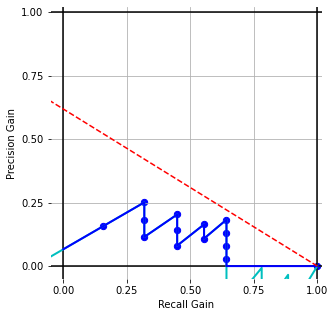

2020-10-18 19:26:37,244 : INFO : auprg:  0.062
2020-10-18 19:26:37,245 : INFO : compute_precision_recall_gain Complete


In [ ]:
supevisedEval.Compute_precision_recall_gain()

## Compute the average precision score¶
Precision is a metric that quantifies the number of correct positive predictions made.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

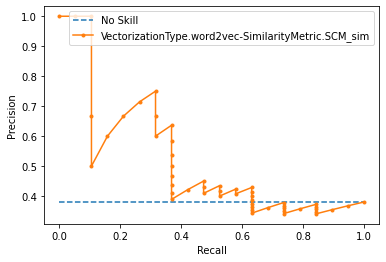

2020-10-18 19:26:40,274 : INFO : Average precision-recall score: 0.53
2020-10-18 19:26:40,275 : INFO : Precision-Recall AUC: 0.518


In [ ]:
supevisedEval.Compute_avg_precision()

## Compute ROC Curve
An ROC curve (or receiver operating characteristic curve) is a plot that summarizes the performance of a binary classification model on the positive class [(see Blog)](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/).

Use ROC when both classes detection is equally important — When we want to give equal weight to both classes prediction ability we should look at the ROC curve [link](https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba).

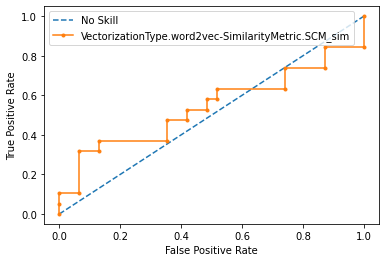

2020-10-18 19:26:42,329 : INFO : ROC AUC 0.540


In [ ]:
supevisedEval.Compute_roc_curve()

## Compute distribution of similarities word2vec

In [ ]:
#Basic Statistics
filter_metrics = word2vec.df_ground_link
filter_metrics.describe()

,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,Linked?
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.427667,0.703438,0.603037,0.396963,0.380000
std,0.094467,0.046301,0.155747,0.155747,0.490314
min,0.255340,0.610164,0.352160,0.078308,0.000000
25%,0.350801,0.667167,0.449102,0.278616,0.000000
50%,0.411666,0.708389,0.630930,0.369070,0.000000
75%,0.498901,0.740303,0.721384,0.550898,1.000000
max,0.638903,0.796597,0.921692,0.647840,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a263130>,
      dtype=object)

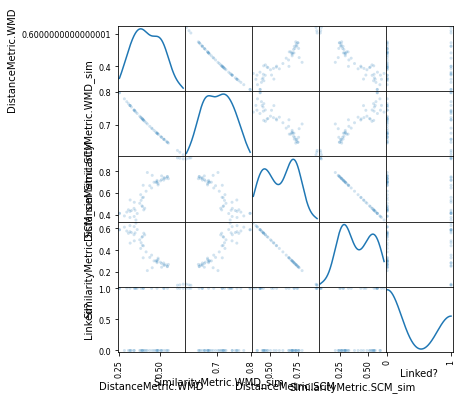

In [ ]:
scatter_matrix(filter_metrics, alpha=0.2, figsize=(6, 6), diagonal='kde')

Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. The lag argument may be passed, and when lag=1 the plot is essentially data[:-1] vs. data[1:].

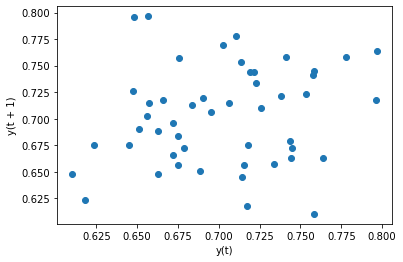

In [ ]:
lag_plot(filter_metrics[[SimilarityMetric.WMD_sim]])

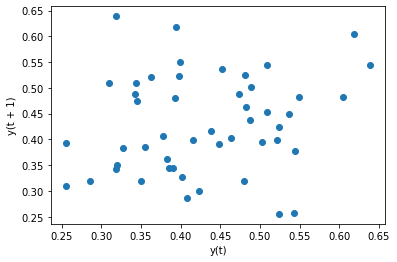

In [ ]:
lag_plot(filter_metrics[DistanceMetric.WMD])

In [ ]:
# calculate model precision-recall curve
sim = np.array(filter_metrics[SimilarityMetric.WMD_sim])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a843100>,
      dtype=object)

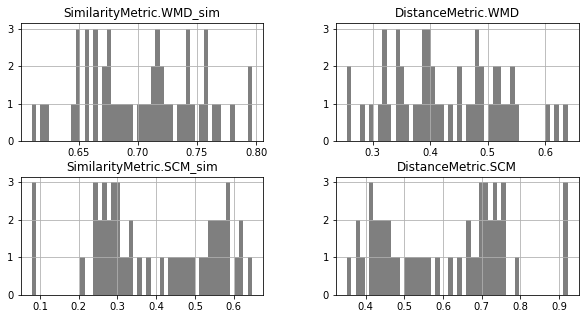

In [ ]:
filter_metrics.hist(column=[SimilarityMetric.WMD_sim,DistanceMetric.WMD,SimilarityMetric.SCM_sim,
                            DistanceMetric.SCM],color='k',bins=50,figsize=[10,5],alpha=0.5)

SimilarityMetric.WMD_sim    0.046301
DistanceMetric.WMD          0.094467
SimilarityMetric.SCM_sim    0.155747
DistanceMetric.SCM          0.155747
dtype: float64


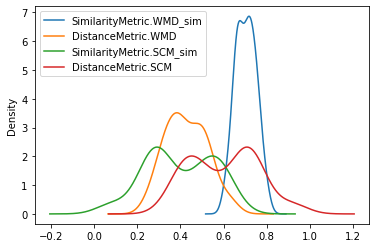

In [ ]:
errors = filter_metrics[[SimilarityMetric.WMD_sim,DistanceMetric.WMD,SimilarityMetric.SCM_sim,
                            DistanceMetric.SCM]].std()
print(errors)
filter_metrics[[SimilarityMetric.WMD_sim,DistanceMetric.WMD,SimilarityMetric.SCM_sim,
                            DistanceMetric.SCM]].plot.kde()

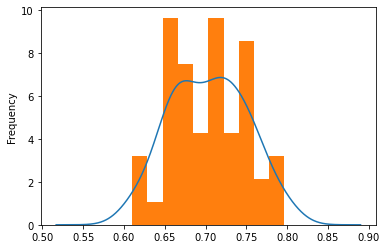

In [ ]:
filter_metrics[SimilarityMetric.WMD_sim].plot.kde()
filter_metrics[SimilarityMetric.WMD_sim].plot.hist(density=True) # Histogram will now be normalized

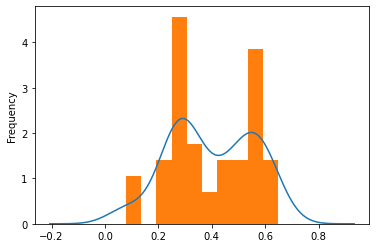

In [ ]:
filter_metrics[SimilarityMetric.SCM_sim].plot.kde()
filter_metrics[SimilarityMetric.SCM_sim].plot.hist(density=True) # Histogram will now be normalized

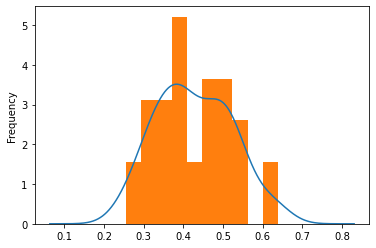

In [ ]:
filter_metrics[DistanceMetric.WMD].plot.kde()
filter_metrics[DistanceMetric.WMD].plot.hist(density=True)

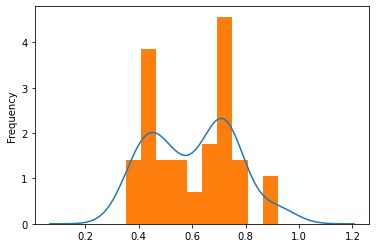

In [ ]:
filter_metrics[DistanceMetric.SCM].plot.kde()
filter_metrics[DistanceMetric.SCM].plot.hist(density=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1240eabb0>,
      dtype=object)

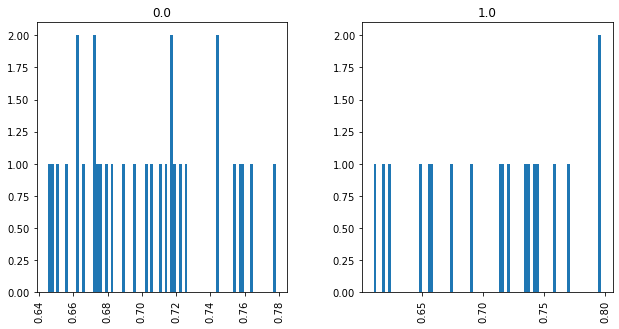

In [ ]:
filter_metrics.hist(by='Linked?',column=SimilarityMetric.WMD_sim ,figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12467e910>,
      dtype=object)

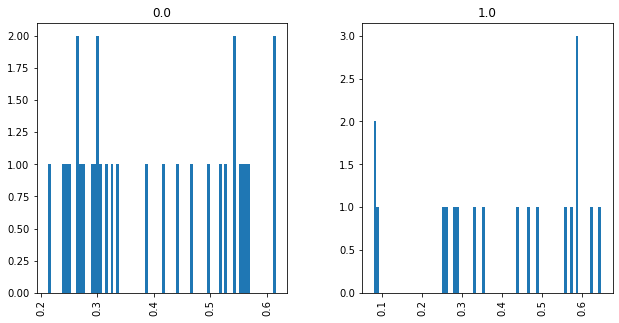

In [ ]:
filter_metrics.hist(by='Linked?',column=SimilarityMetric.SCM_sim ,figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126aaeca0>,
      dtype=object)

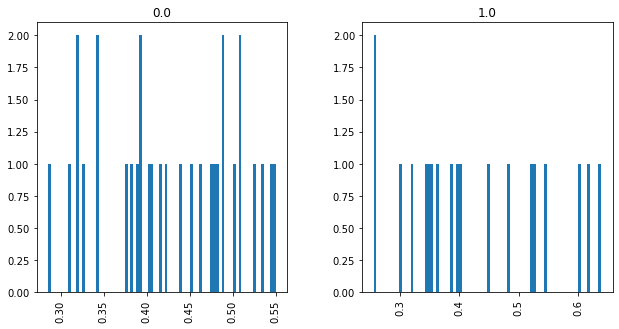

In [ ]:
filter_metrics.hist(by='Linked?',column=DistanceMetric.WMD,figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126f7b0d0>,
      dtype=object)

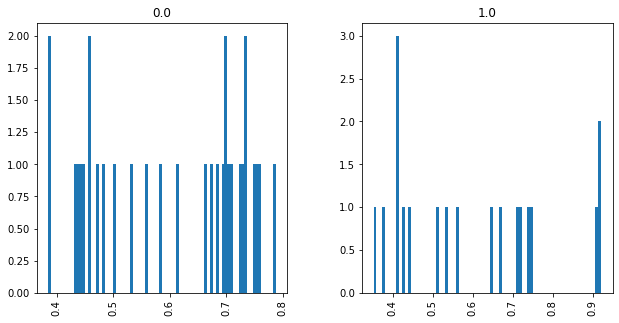

In [ ]:
filter_metrics.hist(by='Linked?',column=DistanceMetric.SCM,figsize=[10, 5],bins=80)

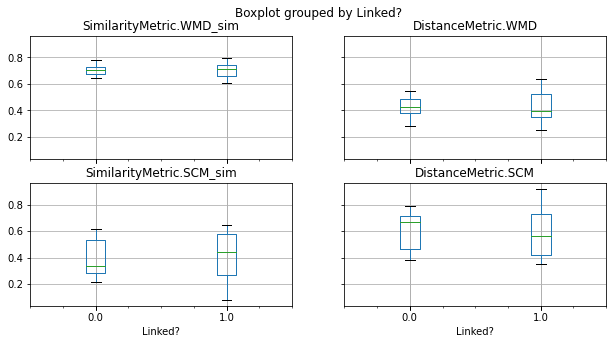

In [ ]:
boxplot = filter_metrics.boxplot(by='Linked?',column=[SimilarityMetric.WMD_sim,DistanceMetric.WMD,SimilarityMetric.SCM_sim,
                            DistanceMetric.SCM],figsize=[10, 5])

In [ ]:
def doc2vec_params():
    return {
        "vectorizationType": VectorizationType.doc2vec,
        "linkType": LinkType.req2tc,
        "system": 'libest',
        "path_to_trained_model": 'test_data/models/doc2vec_libest.model',
        "source_path": 'test_data/[libest-pre-req].csv',
        "target_path": 'test_data/[libest-pre-tc].csv',
        "system_path": 'test_data/[libest-pre-all].csv',
        "saving_path": 'test_data/',
        "names": ['Source','Target','Linked?']
    }

In [ ]:
doc2vec_params = doc2vec_params()
doc2vec_params

{'vectorizationType': <VectorizationType.doc2vec: 2>,
 'linkType': <LinkType.req2tc: 1>,
 'system': 'libest',
 'path_to_trained_model': 'test_data/models/doc2vec_libest.model',
 'source_path': 'test_data/[libest-pre-req].csv',
 'target_path': 'test_data/[libest-pre-tc].csv',
 'system_path': 'test_data/[libest-pre-all].csv',
 'saving_path': 'test_data/',
 'names': ['Source', 'Target', 'Linked?']}

### Testing Doc2Vec SequenceVectorization

In [ ]:
doc2vec = Doc2VecSeqVect(params = doc2vec_params)

2020-10-18 19:27:09,741 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-18 19:27:09,836 : INFO : built Dictionary(6957 unique tokens: ['");', '"../../', '("\\', '();', ')))']...) from 87 documents (total 88944 corpus positions)
2020-10-18 19:27:09,838 : INFO : loading Doc2Vec object from test_data/models/doc2vec_libest.model
2020-10-18 19:27:09,868 : INFO : loading vocabulary recursively from test_data/models/doc2vec_libest.model.vocabulary.* with mmap=None
2020-10-18 19:27:09,869 : INFO : loading trainables recursively from test_data/models/doc2vec_libest.model.trainables.* with mmap=None
2020-10-18 19:27:09,874 : INFO : loading wv recursively from test_data/models/doc2vec_libest.model.wv.* with mmap=None
2020-10-18 19:27:09,883 : INFO : loading docvecs recursively from test_data/models/doc2vec_libest.model.docvecs.* with mmap=None
2020-10-18 19:27:09,886 : INFO : loaded test_data/models/doc2vec_libest.model
2020-10-18 19:27:09,897 : INFO : precomputing L2-norms

In [ ]:
#[step1]Apply Doc2Vec Inference
doc2vec.InferDoc2Vec(steps=200)

2020-10-18 19:27:23,263 : INFO : Infer Doc2Vec on Source and Target Complete


In [ ]:
doc2vec.df_inferred_src.head(2)

,ids,text,inf-doc2vec
0,test_data/LibEST_semeru_format/requirements/RQ...,requir http uri control est server must suppor...,"[-2.8317213, -2.4188962, -6.478969, 3.0023212,..."
1,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat respons request...,"[-3.5909107, -2.1294444, -6.424426, 1.1216303,..."


In [ ]:
#test_inferDoc2Vec_trg = inferDoc2Vec(df_target)
#test_inferDoc2Vec_trg.head()
doc2vec.df_inferred_trg.head(2)

,ids,text,inf-doc2vec
0,test_data/LibEST_semeru_format/test/us903.c,unit test user stori server simpl enrol august...,"[-1.1435783, -0.6797689, -3.8540845, -6.446298..."
1,test_data/LibEST_semeru_format/test/us3496.c,unit test uri path segment extens support marc...,"[-7.902094, -3.171574, -2.0337508, 0.39059234,..."


In [ ]:
#[step 2]NonGroundTruth Computation
doc2vec.ComputeDistanceArtifacts( sampling=True, samples = 50, metric_list = [DistanceMetric.EUC] )
doc2vec.df_nonground_link.head()

2020-10-18 19:27:35,627 : INFO : Computed distances or similarities ('RQ8-pre.txt', 'us3612.c')[[27.23440933227539, 0.035417776523374175]]
2020-10-18 19:27:35,642 : INFO : Computed distances or similarities ('RQ40-pre.txt', 'us896.c')[[22.97349739074707, 0.041712729006572274]]
2020-10-18 19:27:35,647 : INFO : Computed distances or similarities ('RQ13-pre.txt', 'us899.c')[[27.776687622070312, 0.0347503511569222]]
2020-10-18 19:27:35,653 : INFO : Computed distances or similarities ('RQ5-pre.txt', 'us3496.c')[[33.48546600341797, 0.028997723269880902]]
2020-10-18 19:27:35,661 : INFO : Computed distances or similarities ('RQ53-pre.txt', 'us2174.c')[[45.23784255981445, 0.02162730665269199]]
2020-10-18 19:27:35,669 : INFO : Computed distances or similarities ('RQ8-pre.txt', 'us4020.c')[[29.1542911529541, 0.033162775902362204]]
2020-10-18 19:27:35,673 : INFO : Computed distances or similarities ('RQ24-pre.txt', 'us897.c')[[24.291915893554688, 0.03953832537671995]]
2020-10-18 19:27:35,678 : INF

,Source,Target,DistanceMetric.EUC,SimilarityMetric.EUC_sim
0,RQ8-pre.txt,us3612.c,27.234409,0.035418
1,RQ40-pre.txt,us896.c,22.973497,0.041713
2,RQ13-pre.txt,us899.c,27.776688,0.034750
3,RQ5-pre.txt,us3496.c,33.485466,0.028998
4,RQ53-pre.txt,us2174.c,45.237843,0.021627


In [ ]:
#[step 3]Saving Non-GroundTruth Links
doc2vec.SaveLinks()

2020-10-18 19:27:38,667 : INFO : Saving in...test_data/[libest-VectorizationType.doc2vec-LinkType.req2tc-False-1603063658.662815].csv


In [ ]:
#Loading Non-GroundTruth Links (change the timestamp with the assigned in the previous step)
df_nonglinks_doc2vec = LoadLinks(timestamp=1603056377.906573, params=doc2vec_params)
df_nonglinks_doc2vec.head()

2020-10-18 19:27:39,742 : INFO : Loading computed links from... test_data/[libest-VectorizationType.doc2vec-LinkType.req2tc-False-1603056377.906573].csv


,Source,Target,DistanceMetric.EUC,SimilarityMetric.EUC_sim
0,RQ5-pre.txt,us3512.c,32.463028,0.029884
1,RQ21-pre.txt,us4020.c,28.574036,0.033813
2,RQ15-pre.txt,us1005.c,32.506367,0.029845
3,RQ32-pre.txt,us897.c,24.160978,0.039744
4,RQ34-pre.txt,us898.c,29.958860,0.032301


In [ ]:
#[step 4]GroundTruthMatching Testing
path_to_ground_truth = 'test_data/[libest-ground-req-to-tc].txt'
doc2vec.MatchWithGroundTruth(path_to_ground_truth)
doc2vec.df_ground_link

2020-10-18 19:27:58,664 : INFO : Groundtruth links computed


,Source,Target,DistanceMetric.EUC,SimilarityMetric.EUC_sim,Linked?
0,RQ8-pre.txt,us3612.c,27.234409,0.035418,1.0
1,RQ40-pre.txt,us896.c,22.973497,0.041713,0.0
2,RQ13-pre.txt,us899.c,27.776688,0.034750,0.0
3,RQ5-pre.txt,us3496.c,33.485466,0.028998,0.0
4,RQ53-pre.txt,us2174.c,45.237843,0.021627,0.0
5,RQ8-pre.txt,us4020.c,29.154291,0.033163,1.0
6,RQ24-pre.txt,us897.c,24.291916,0.039538,0.0
7,RQ4-pre.txt,us1159.c,33.715771,0.028805,0.0
8,RQ31-pre.txt,us896.c,21.696489,0.044060,0.0
9,RQ20-pre.txt,us1883.c,38.487007,0.025325,0.0


In [ ]:
#[step 5]Saving GroundTruth Links
doc2vec.SaveLinks(grtruth = True)

2020-10-18 19:28:00,249 : INFO : Saving in...test_data/[libest-VectorizationType.doc2vec-LinkType.req2tc-True-1603063680.24686].csv


In [ ]:
#Loading Non-GroundTruth Links (change the timestamp with the assigned in the previous step)
df_glinks_doc2vec = LoadLinks(timestamp=1603063680.24686, params=doc2vec_params, grtruth = True)
df_glinks_doc2vec.head()

2020-10-18 19:28:08,950 : INFO : Loading computed links from... test_data/[libest-VectorizationType.doc2vec-LinkType.req2tc-True-1603063680.24686].csv


,Source,Target,DistanceMetric.EUC,SimilarityMetric.EUC_sim,Linked?
0,RQ8-pre.txt,us3612.c,27.234409,0.035418,1.0
1,RQ40-pre.txt,us896.c,22.973497,0.041713,0.0
2,RQ13-pre.txt,us899.c,27.776688,0.034750,0.0
3,RQ5-pre.txt,us3496.c,33.485466,0.028998,0.0
4,RQ53-pre.txt,us2174.c,45.237843,0.021627,0.0


# Approach Evaluation and Interpretation (doc2vec)

In [ ]:
supervisedEvalDoc2vec = SupervisedVectorEvaluation(doc2vec, similarity=SimilarityMetric.EUC_sim)

In [ ]:
supervisedEvalDoc2vec.y_test

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.])

In [ ]:
supervisedEvalDoc2vec.y_score

array([0.03541778, 0.04171273, 0.03475035, 0.02899772, 0.02162731,
       0.03316278, 0.03953833, 0.02880535, 0.04405968, 0.02532479,
       0.02793206, 0.0287591 , 0.02225518, 0.02830499, 0.0342694 ,
       0.04598991, 0.03725973, 0.0240362 , 0.02651379, 0.03617325,
       0.02766799, 0.02998513, 0.02414327, 0.04459385, 0.03041159,
       0.02937196, 0.02391515, 0.02935402, 0.03652414, 0.02726818,
       0.04557955, 0.03119887, 0.03199925, 0.02793213, 0.03477711,
       0.04541905, 0.03039143, 0.02428295, 0.02988223, 0.02558915,
       0.03378266, 0.03583102, 0.03587346, 0.02868129, 0.03004593,
       0.02516732, 0.03438064, 0.03814636, 0.03191514, 0.03391339])

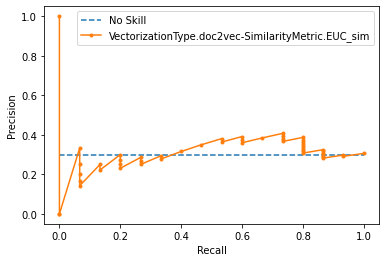

2020-10-18 19:28:15,277 : INFO : Average precision-recall score: 0.33
2020-10-18 19:28:15,277 : INFO : Precision-Recall AUC: 0.305


In [ ]:
supervisedEvalDoc2vec.Compute_avg_precision()

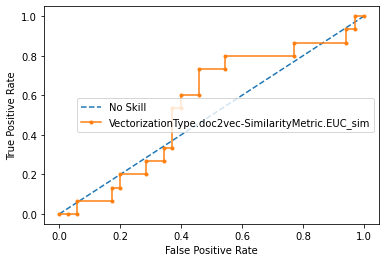

2020-10-18 19:28:15,918 : INFO : ROC AUC 0.552


In [ ]:
supervisedEvalDoc2vec.Compute_roc_curve()

/Users/willkinney/opt/anaconda3/lib/python3.8/site-packages/prg/prg.py:271: RuntimeWarning: invalid value encountered in double_scalars
  return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])


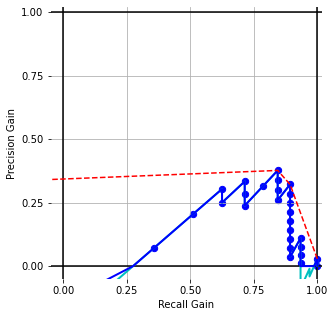

2020-10-18 19:28:16,337 : INFO : auprg:  0.115
2020-10-18 19:28:16,338 : INFO : compute_precision_recall_gain Complete


In [ ]:
supervisedEvalDoc2vec.Compute_precision_recall_gain()

## Compute distribution of similarities doc2vec

In [ ]:
#Basic Statistics
filter_doc2vec = doc2vec.df_ground_link
filter_doc2vec.describe()

,DistanceMetric.EUC,SimilarityMetric.EUC_sim,Linked?
count,50.000000,50.000000,50.00000
mean,31.352973,0.032058,0.30000
std,6.134574,0.006341,0.46291
min,20.743900,0.021627,0.00000
25%,26.990188,0.027932,0.00000
50%,31.893106,0.030402,0.00000
75%,34.801132,0.035728,1.00000
max,45.237843,0.045990,1.00000


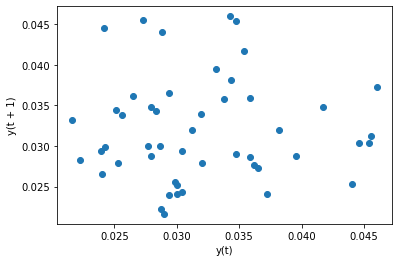

In [ ]:
lag_plot(filter_doc2vec[[SimilarityMetric.EUC_sim]])

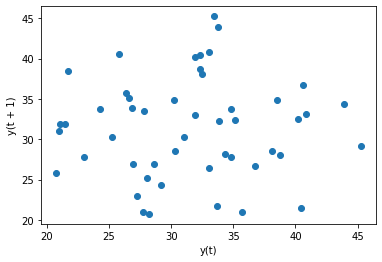

In [ ]:
lag_plot(filter_doc2vec[DistanceMetric.EUC])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1281db2e0>,
      dtype=object)

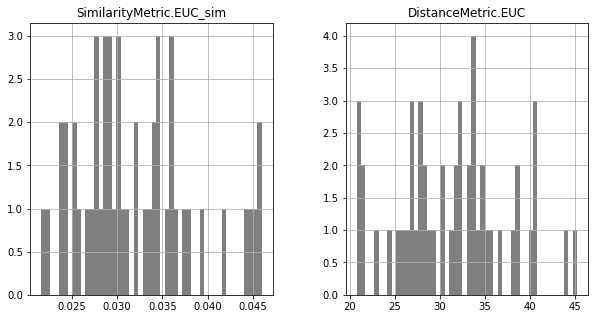

In [ ]:
filter_doc2vec.hist(column=[SimilarityMetric.EUC_sim,DistanceMetric.EUC],color='k',bins=50,figsize=[10,5],alpha=0.5)

SimilarityMetric.EUC_sim    0.006341
DistanceMetric.EUC          6.134574
dtype: float64


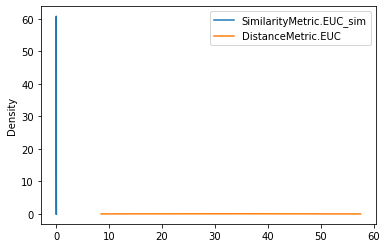

In [ ]:
#Separate distance from similarity analysis here
errors = filter_doc2vec[[SimilarityMetric.EUC_sim,DistanceMetric.EUC]].std()
print(errors)
filter_doc2vec[[SimilarityMetric.EUC_sim,DistanceMetric.EUC]].plot.kde()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128459190>,
      dtype=object)

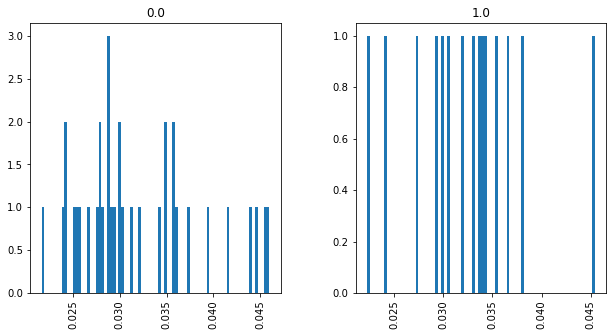

In [ ]:
filter_doc2vec.hist(by='Linked?',column=SimilarityMetric.EUC_sim,figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12856aa60>,
      dtype=object)

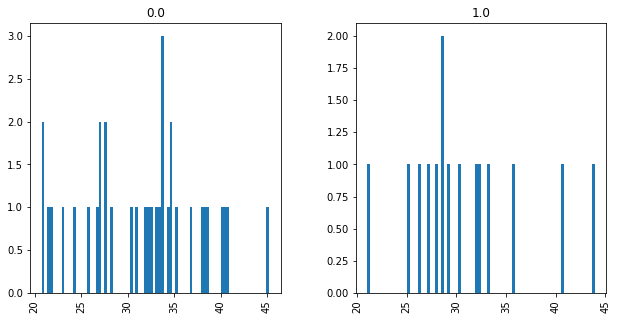

In [ ]:
filter_doc2vec.hist(by='Linked?',column=DistanceMetric.EUC,figsize=[10, 5],bins=80)

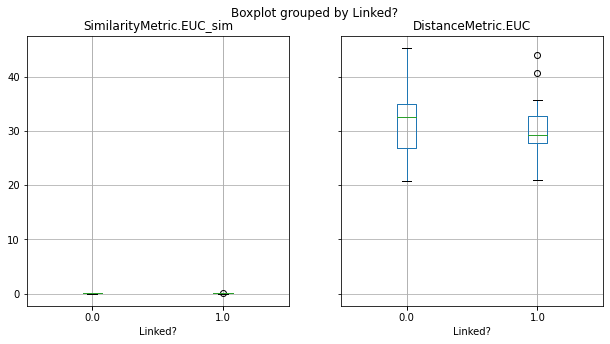

In [ ]:
#separate the distance from the similarity plot
boxplot = filter_doc2vec.boxplot(by='Linked?',column=[SimilarityMetric.EUC_sim,DistanceMetric.EUC],figsize=[10, 5])

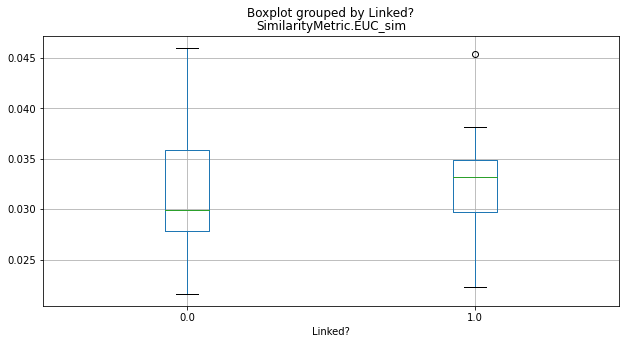

In [ ]:
boxplot = filter_doc2vec.boxplot(by='Linked?',column=[SimilarityMetric.EUC_sim],figsize=[10, 5])